# Abstract:
   - To predict a wine quality is good or bad

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
wine = pd.read_csv("redwine.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

#### The Dataset has 1599 records/row and 12 attributes/columns

In [5]:
#checking the column names of the wine dataset
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# general information of the wine dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- The general information on columns is given in this table

In [7]:
# using lambda fucntion for conversion
wine["quality"] = wine["quality"].apply(lambda x: 1 if x >= 7 else 0 )

- The functions changes the values of quality column when the quality is greater than or equal to 7 it is converted to 1 and when the quality is less than 7 it is converted to 0

In [8]:
# check the first five record of the table
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
# check the sample of the dataframe
wine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,0


In [10]:
# check the values in the quality column
column = ['quality']
for values in column:
    print(np.unique(wine[values]))

[0 1]


# Indentify the types of problems(Regression/Classification)

In [11]:
# checking the type of the dataset
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### The "quality" column can be categorized under categorical variable - 1/good and 0/not good
 - supervised/classification
    ### the evaluation metrics are:
       - accuracy score
        - confusion matric
         - classification report
    

# EDA - Exploratory Data Analysis

### summary statistics

In [12]:
# describe the summary statistics
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


- Observation:
     - The max-min range for Fixed acidity, residual sugar, free sulfur dioxide,total sulfur dioxide is huge.
     - so, scaling can be applied.

#### univariate analysis

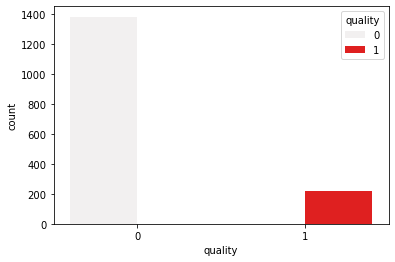

In [13]:
sns.countplot(x='quality' , color="red", hue = 'quality', data=wine, hue_order=[0,1])

- Observation:
    - Almost 300 records belong to a good quality wine
    - More the 1000 record belong to a bad quality wine

In [14]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### multivariate analysis

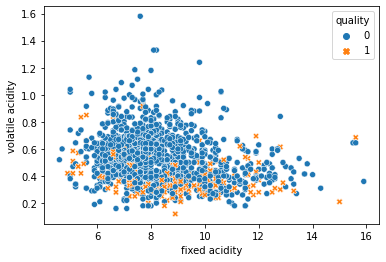

In [15]:
sns.scatterplot(x='fixed acidity', y= 'volatile acidity', hue="quality", data=wine, sizes = 15, style="quality")

- Observation:
    - The volatile acidity and fixed acidity does not show good realtionship the data is concentrated.
    

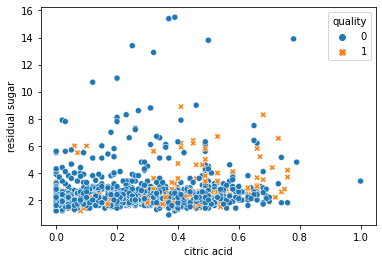

In [16]:
sns.scatterplot(x='citric acid', y= 'residual sugar', hue="quality", data=wine, sizes = 15, style="quality")

- Observation:
  - The citric acid and residual sugar does not show good realtionship. the citric acid and the less the residual sugar are equal in content.

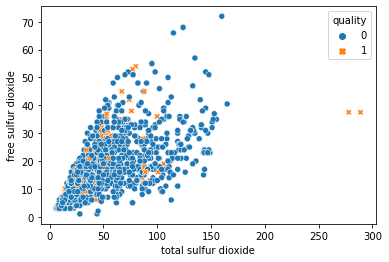

In [17]:
sns.scatterplot(x='total sulfur dioxide', y= 'free sulfur dioxide', hue="quality", data=wine, sizes = 15, style="quality")

- observation :
    - the free sulfare dioxide and total sulfare dioxide have a linear relationship.
    - As the free sulfare dioxide increase the total sulfare dioxide content also increases.
    

#### mulrivariate analysis

In [18]:
#sns.pairplot(wine, hue="quality", kind='scatter')

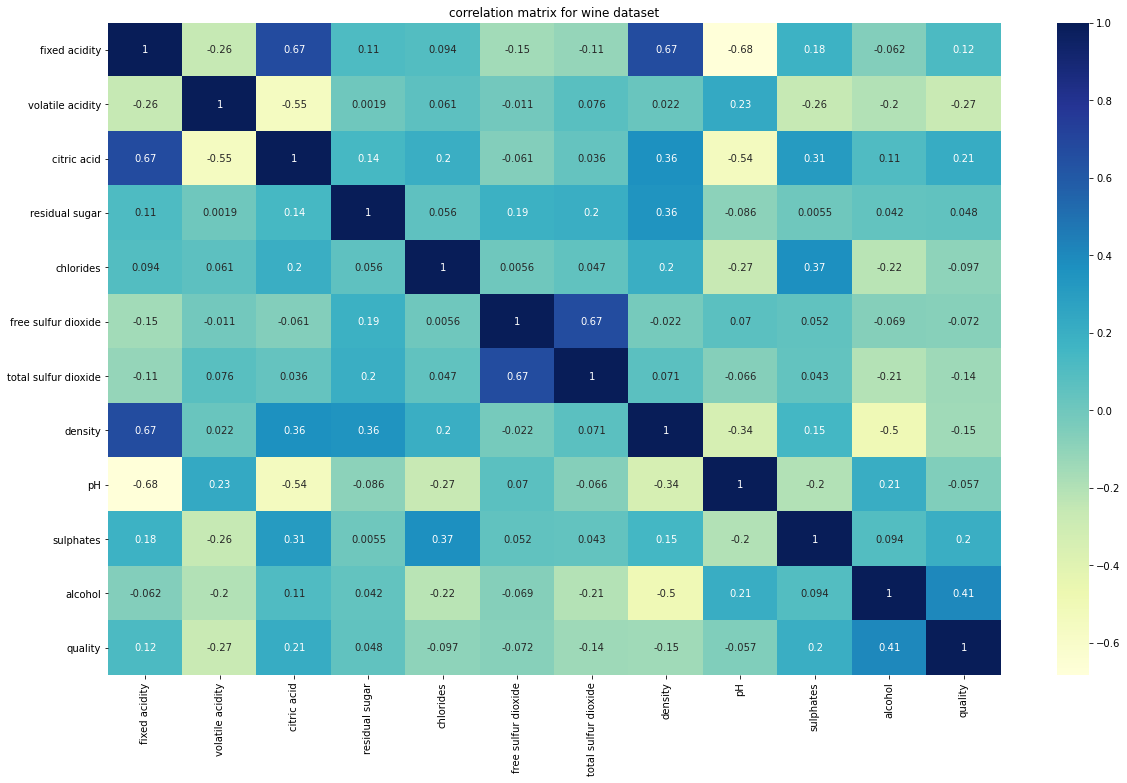

In [19]:
corr_mat = wine.corr()
plt.figure(figsize=[20,12])
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
plt.title("correlation matrix for wine dataset")
plt.show()

- Observation:
    - The heatmap display correlation between the columns.
    - The independent variables have a positive as well as negative relationship with "quality".
    - "FSD" and "TSD" are highly correlated with each other
    - FSD correlation with quality is -0.072
    - TSD correlation with quality is -0.14
    - considering FSD to be in high correlation with dependant variable we will drop TSD.
    - "density","fixed acidity" and, "citric acid" are in high correlation with each other
    - Density correlation with quality is -0.15
    - Citric acid correlation with quality is 0.21
    - Fixed acidity correlation with quality is 0.12
    - considering Citirc acid to be in high correaltion with quality we can drop fixed acidity and density
    
    

In [20]:
# find the correlaion of class variable with other variables
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending= False)
#higest - lowest

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

- observation:
    - alchohol, citric acid, sulphates, fixed acidity, and, residual sugar are positively correlated with Quality
    - ph, FSD, TSD, chlorides, volatile acidity are negatively correlated with quality

# Data Cleaning

In [21]:
wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

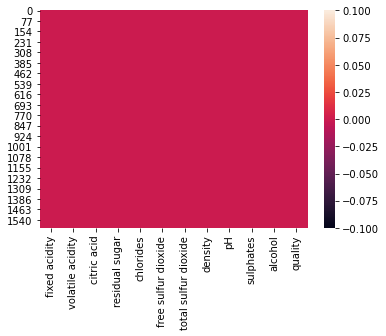

In [23]:
sns.heatmap(wine.isnull())

- observations:
    - There are no null values in the dataset

# checking skewness and removal

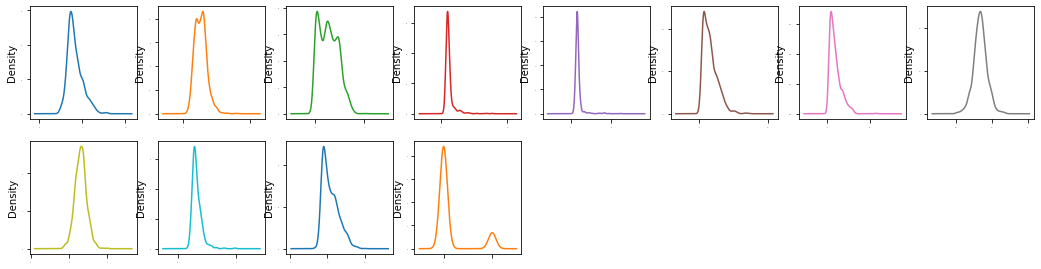

In [24]:
#denisity plot 
wine.plot(kind= "density", subplots= True, layout = (5,8), sharex=False, legend = False, fontsize =1 , figsize=(18,12))
plt.show()

- observation:
    - Some of the columns have skewness which can be removed.

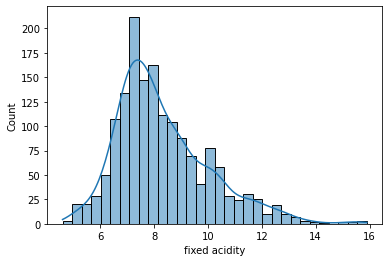

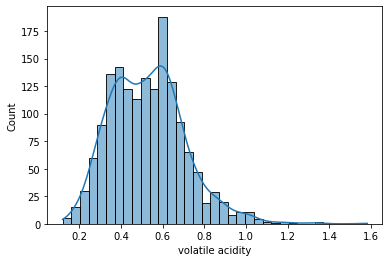

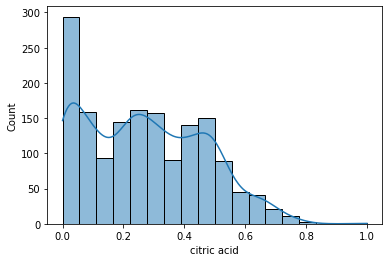

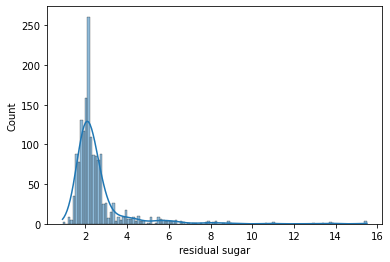

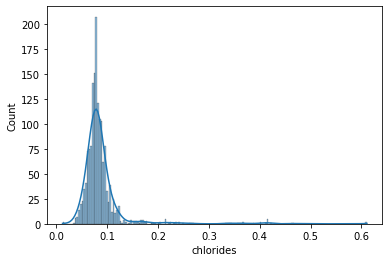

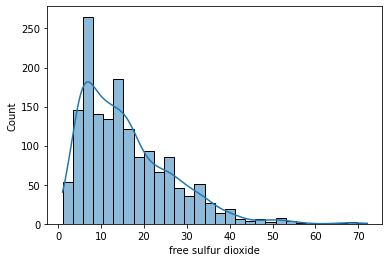

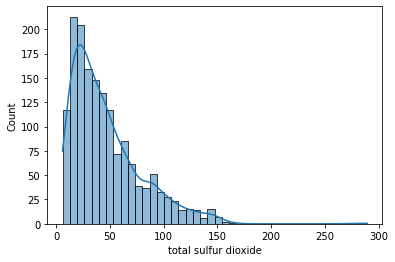

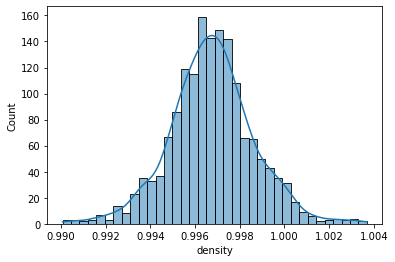

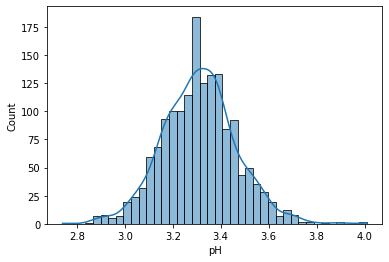

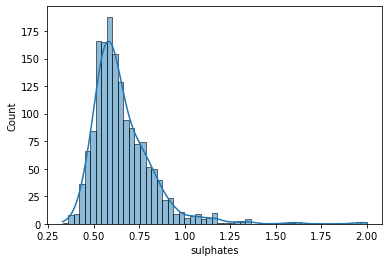

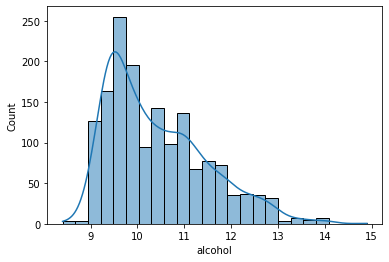

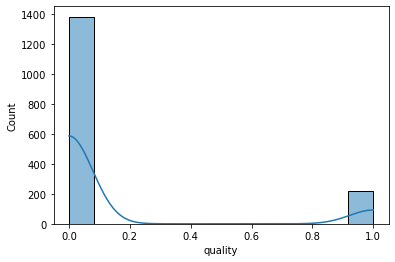

In [25]:
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for value in col:
    sns.histplot(data = wine, x=value, kde=True)
    plt.show()

- observation:
    - the normal distribution shows that the data is skewed. 

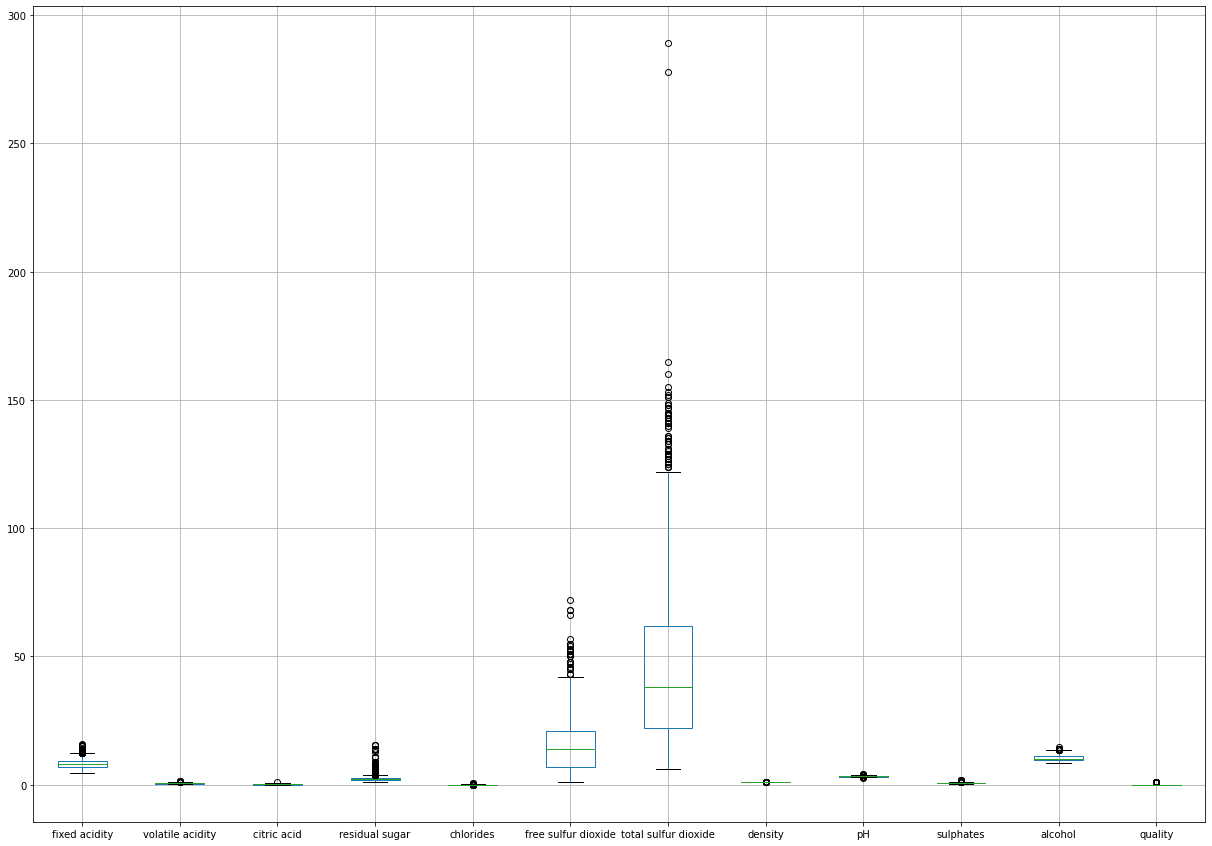

In [26]:
wine.boxplot(figsize = [21,15])
plt.show()

- observation:
    - The columns : Density, TSD and fixed acidity.
    - Density column has fewer outlier is partial normalized
    - TSD has huge number of outliers and it is not normalized
    - Fixed acidity has outlier is not normalized 
    

In [27]:
delete = pd.DataFrame([["-0.150460", "Density", "No", "few outliers"],["-0.139517", "Total Sulphur Dioxide", "No", "Alot"],["0.120061", "Fixed Acidity", "No", "Alot"]], columns=["Correlation with Target","Column Name", "Normalized", "Outliers"])

In [28]:
delete

,Correlation with Target,Column Name,Normalized,Outliers
0,-0.150460,Density,No,few outliers
1,-0.139517,Total Sulphur Dioxide,No,Alot
2,0.120061,Fixed Acidity,No,Alot


- we set the threshold of correlation +/- 0.4

In [29]:
wine = wine.drop(['fixed acidity',  'total sulfur dioxide', 'density'], axis=1)

In [30]:
wine

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,3.51,0.56,9.4,0
1,0.880,0.00,2.6,0.098,25.0,3.20,0.68,9.8,0
2,0.760,0.04,2.3,0.092,15.0,3.26,0.65,9.8,0
3,0.280,0.56,1.9,0.075,17.0,3.16,0.58,9.8,0
4,0.700,0.00,1.9,0.076,11.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5,0
1595,0.550,0.10,2.2,0.062,39.0,3.52,0.76,11.2,0
1596,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0,0
1597,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2,0


- observation:
    - we have dropped 3 columns considering them to have more number of ouliers and poor correlation with target variable.
    

In [31]:
#splitting the indendent and dependent variables
x = wine.drop("quality", axis = 1)
y = wine["quality"]


In [32]:
x.skew()
# skewness present in the independent columns

volatile acidity       0.671593
citric acid            0.318337
residual sugar         4.540655
chlorides              5.680347
free sulfur dioxide    1.250567
pH                     0.193683
sulphates              2.428672
alcohol                0.860829
dtype: float64

- Observation:
    There is a skewness present in few of the variables which can be removed with power tranformation.

In [33]:
from sklearn.preprocessing import power_transform

#intialize
redwine = power_transform(x)

#create the new dataframe
redwine = pd.DataFrame(redwine, columns = x.columns)


In [34]:
redwine.skew()

volatile acidity       0.003099
citric acid            0.017788
residual sugar        -0.015715
chlorides             -0.151304
free sulfur dioxide   -0.009948
pH                    -0.002823
sulphates              0.009985
alcohol                0.112372
dtype: float64

- skewness removed

In [35]:
x = redwine

# Checking for outlier and removal

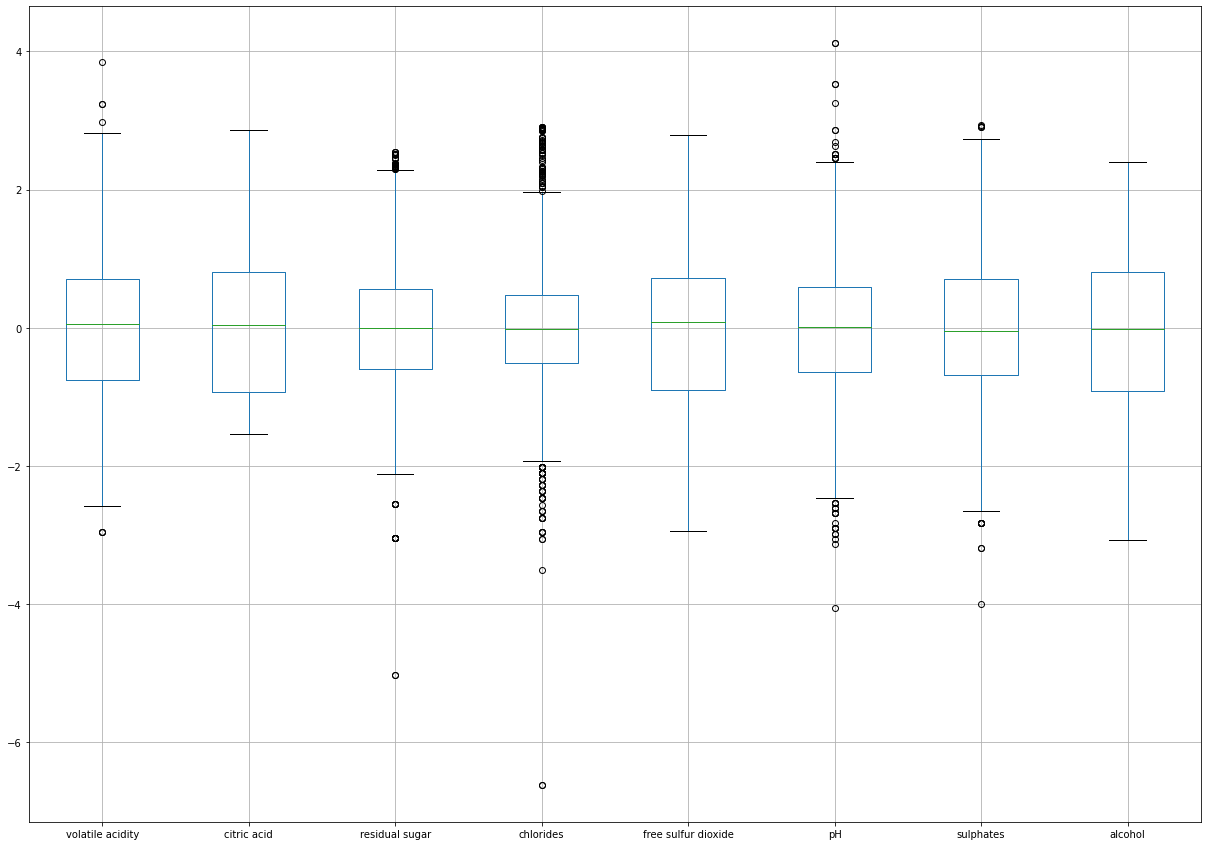

In [36]:
x.boxplot(figsize = [21,15])
plt.show()

- Observation:
    - Outlier can be removed with z-score method.

In [37]:
# z-score to find the outlier
from scipy import stats
import numpy as np

z= np.abs(stats.zscore(redwine))
print(z)

[[9.95541630e-01 1.53110932e+00 5.97145084e-01 ... 1.27568965e+00
  5.81649810e-01 1.07502541e+00]
 [1.77129873e+00 1.53110932e+00 5.56565197e-01 ... 7.09517433e-01
  3.95139954e-01 5.00859609e-01]
 [1.26980139e+00 1.25535866e+00 1.52372484e-01 ... 3.10054073e-01
  1.83771552e-01 5.00859609e-01]
 ...
 [3.87065014e-04 6.83293826e-01 1.52372484e-01 ... 7.18868617e-01
  8.20841495e-01 7.34557526e-01]
 [7.28552770e-01 7.43826364e-01 3.80998064e-01 ... 1.63859528e+00
  5.88343819e-01 1.87998601e-02]
 [1.32045850e+00 1.03107021e+00 1.37543465e+00 ... 5.29831617e-01
  2.56369273e-01 7.34557526e-01]]


In [38]:
#define a thershold to identify the outlier
thershold = 3
print(np.where(z>3))

(array([   7,   45,   95,  126,  127,  151,  170,  198,  469,  517,  544,
        544,  614,  695,  695,  797,  836,  837,  909,  914, 1017, 1018,
       1287, 1299, 1316, 1316, 1321, 1321, 1369, 1374, 1571], dtype=int64), array([2, 5, 5, 0, 0, 5, 6, 2, 2, 7, 5, 7, 5, 3, 5, 3, 3, 3, 2, 2, 2, 2,
       6, 0, 2, 5, 2, 5, 6, 2, 3], dtype=int64))


In [39]:
x = x[(z<3).all(axis=1)]
y =y[(z<3).all(axis=1)]

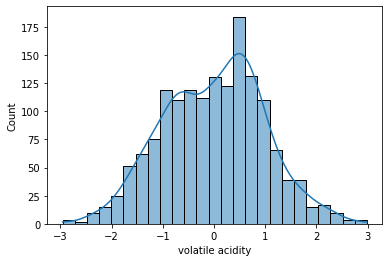

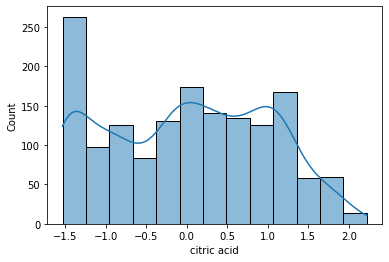

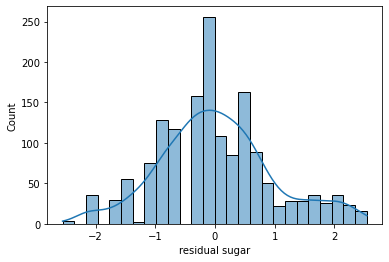

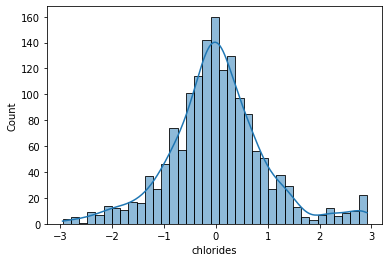

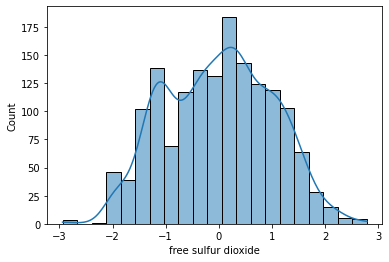

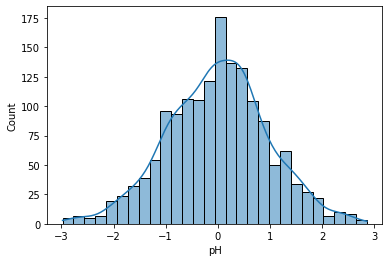

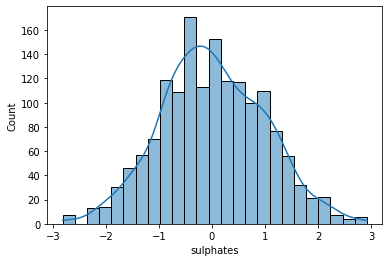

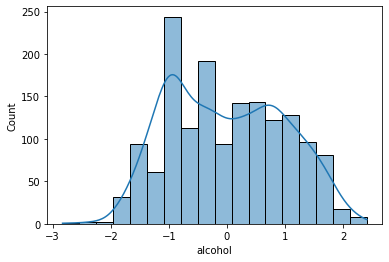

In [41]:
col = [ 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide',
       'pH', 'sulphates', 'alcohol']
for value in col:
    sns.histplot(data = x, x=value, kde=True)
    plt.show()

In [42]:
y.shape

(1572,)

In [43]:
x.shape

(1572, 8)

- observation:
    - There were 1599 records
    - After outlier removal, there are 1572 

# finding the best random state

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
## finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    lr.fit(x_train, y_train)
    predf = lr.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.913135593220339  on Random State  891


- The best random state is 891

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 891)

In [48]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(472, 8)
(472,)
(1100, 8)
(1100,)


# Finding the Best Algorithm

In [49]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.913135593220339
[[407   9]
 [ 32  24]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       416
           1       0.73      0.43      0.54        56

    accuracy                           0.91       472
   macro avg       0.83      0.70      0.75       472
weighted avg       0.90      0.91      0.90       472



In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8834745762711864
[[385  31]
 [ 24  32]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       416
           1       0.51      0.57      0.54        56

    accuracy                           0.88       472
   macro avg       0.72      0.75      0.74       472
weighted avg       0.89      0.88      0.89       472



In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.9194915254237288
[[409   7]
 [ 31  25]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       416
           1       0.78      0.45      0.57        56

    accuracy                           0.92       472
   macro avg       0.86      0.71      0.76       472
weighted avg       0.91      0.92      0.91       472



In [52]:

from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
#randomforestcassifier(100)---default

ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy score of " ,ad, " is: ")
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


Accuracy score of  AdaBoostClassifier()  is: 
0.9004237288135594
[[404  12]
 [ 35  21]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       416
           1       0.64      0.38      0.47        56

    accuracy                           0.90       472
   macro avg       0.78      0.67      0.71       472
weighted avg       0.89      0.90      0.89       472



In [53]:
from sklearn.svm import SVC

svc = SVC(kernel = "rbf", probability = True)
svc.fit(x_train,y_train)

predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.902542372881356
[[412   4]
 [ 42  14]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       416
           1       0.78      0.25      0.38        56

    accuracy                           0.90       472
   macro avg       0.84      0.62      0.66       472
weighted avg       0.89      0.90      0.88       472



# Checking the difference between cross validation score and training score

In [54]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(lr, x, y, cv = 5)
print("The accuracy score logistic regression : ", round((accuracy_score(y_test, predlr))*100))
print("the cross validation score of Logisting regression model :", round((lr_scr.mean())*100))
diff = round((accuracy_score(y_test, predlr))*100) - round((lr_scr.mean())*100)
print("The difference is : " , diff )

The accuracy score logistic regression :  91.0
the cross validation score of Logisting regression model : 87.0
The difference is :  4.0


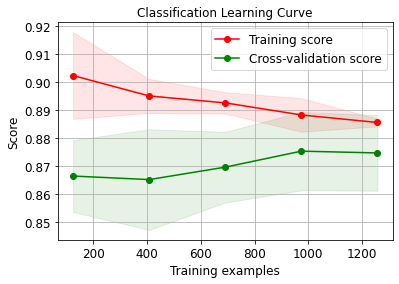

In [55]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

In [56]:
from sklearn.model_selection import cross_val_score

dt_scr = cross_val_score(dt, x, y, cv = 5)
print("The accuracy score decisiontree classifier : ", round((accuracy_score(y_test, preddt))*100))
print("the cross validation score of decisiontree classifier  :", round((dt_scr.mean())*100))
diff = round((accuracy_score(y_test, preddt))*100) - round((dt_scr.mean())*100)
print("The difference is : " , diff )

The accuracy score decisiontree classifier :  88.0
the cross validation score of decisiontree classifier  : 80.0
The difference is :  8.0


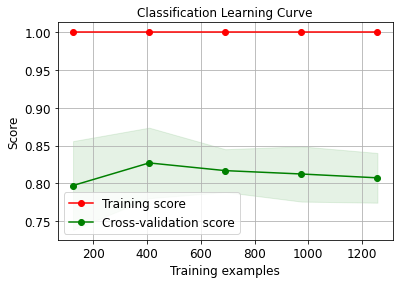

In [57]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dt, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

In [58]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(rf, x, y, cv = 5)
print("The accuracy score Random Forest classifier : ", round((accuracy_score(y_test, predrf))*100))
print("the cross validation score of Random Forest classifier  :", round((rf_scr.mean())*100))
diff = round((accuracy_score(y_test, predrf))*100) - round((rf_scr.mean())*100)
print("The difference is : " , diff )

The accuracy score Random Forest classifier :  92.0
the cross validation score of Random Forest classifier  : 87.0
The difference is :  5.0


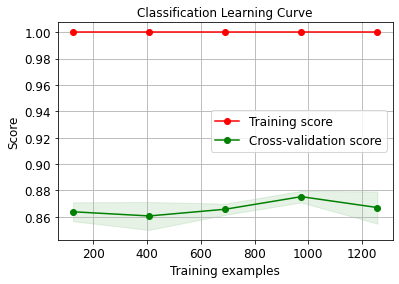

In [59]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(rf, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

In [60]:
from sklearn.model_selection import cross_val_score

ad_scr = cross_val_score(ad, x, y, cv = 5)
print("The accuracy score Ada Boost classifier : ", round((accuracy_score(y_test, predad))*100))
print("the cross validation score of Ada Boost classifier  :", round((ad_scr.mean())*100))
diff = round((accuracy_score(y_test, predad))*100) - round((ad_scr.mean())*100)
print("The difference is : " , diff )

The accuracy score Ada Boost classifier :  90.0
the cross validation score of Ada Boost classifier  : 86.0
The difference is :  4.0


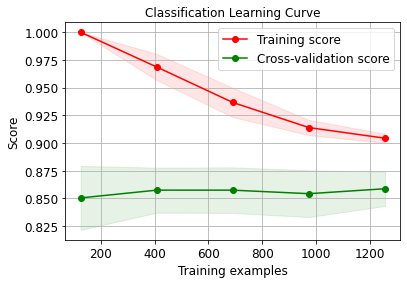

In [61]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(ad, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

In [62]:
from sklearn.model_selection import cross_val_score

svc_scr = cross_val_score(svc, x, y, cv = 5)
print("The accuracy score svm classifier : ", round((accuracy_score(y_test, predsvc))*100))
print("the cross validation score of svm classifier  :", round((svc_scr.mean())*100))
diff = round((accuracy_score(y_test, predsvc))*100) - round((svc_scr.mean())*100)
print("The difference is : " , diff )

The accuracy score svm classifier :  90.0
the cross validation score of svm classifier  : 87.0
The difference is :  3.0


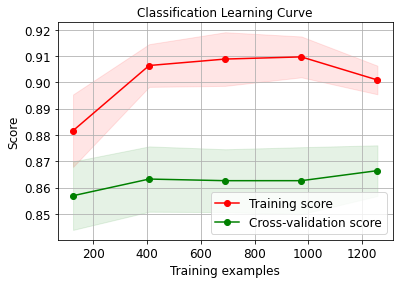

In [63]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(svc, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

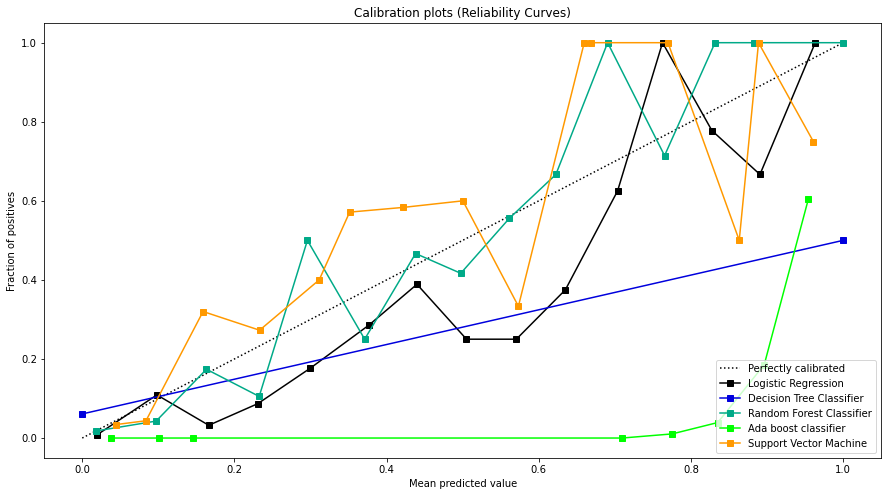

In [64]:
lr_prob = lr.fit(x_train,y_train).predict_proba(x_test)
dt_prob = dt.fit(x_train,y_train).predict_proba(x_test)
rf_prob = rf.fit(x_train,y_train).predict_proba(x_test)
ad_prob = ad.fit(x_train,y_train).predict_proba(x_test)
svc_prob = svc.fit(x_train,y_train).predict_proba(x_test)
probas_list = [lr_prob,dt_prob,rf_prob,ad_prob,svc_prob]
clf_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Ada boost classifier', 'Support Vector Machine']
skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(15,8)
                                     );

- Observation:
    - SVC shows the best accuracy score considering the difference between the training score and the cross validation score
    - the SVC line gives a better reliability with the mean of predicted value

# Hyper parameter tuning 

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {"kernel":['rbf'],'C':[0.001, 0.10, 0.0001,0.00001], 'gamma': [1,0.1,0.01,0.001]}

In [67]:
GCV =GridSearchCV(SVC(), parameters, refit=True,verbose=2)

In [68]:
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .................. C=0.001, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .................. C=0.001, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .................. C=0.001, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .

[CV] ................... C=1e-05, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1e-05, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=1e-05, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1e-05, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=1e-05, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1e-05, gamma=0.01, kernel=rbf .................................
[CV] .................. C=1e-05, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1e-05, gamma=0.01, kernel=rbf .................................
[CV] .................. C=1e-05, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1e-05, gamma=0.01, kernel=rbf .................................
[CV] .................. C=1e-05, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1e-05, gamma=0.01, kernel=rbf .................................
[CV] .................. C=1e-05, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1e-05, gamma=0.01, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 0.0001, 1e-05],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=2)

In [69]:
GCV.best_params_
#printing the best parameter found by GridSearchCV

{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}

In [70]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [71]:

accuracy_score(y_test, GCV_pred)

0.8813559322033898

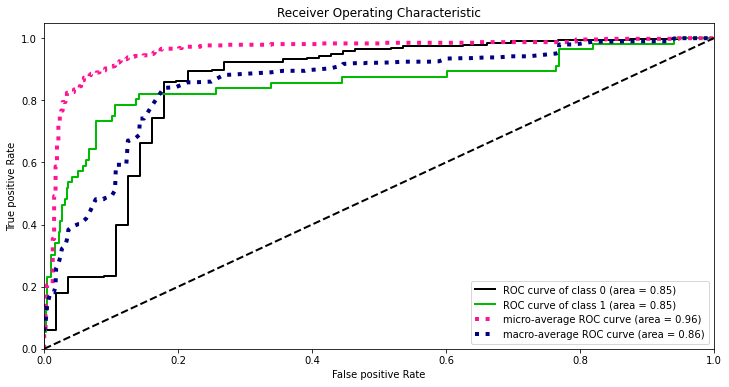

In [72]:
from sklearn.metrics import roc_curve, auc

test_prob = svc.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

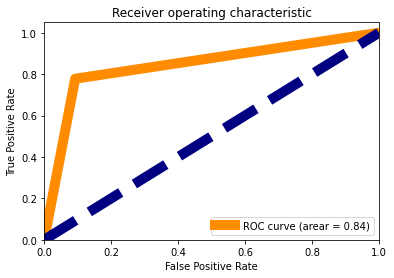

In [75]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predsvc, y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr, color="darkorange", lw=10, label='ROC curve (arear = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color="navy", lw=10, linestyle = "--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.
- The Roc curve value = 0.84 
- the classification model perfomance well 

In [77]:
import joblib
joblib.dump(GCV.best_estimator_, "RedWinefinak.pkl")

['RedWinefinak.pkl']

In [79]:
import numpy as np
a = np.array(y_test)
predicted = np.array(predsvc)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
467,0,0
468,0,0
469,0,0
470,0,0
